# Setting up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sklearn-genetic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from genetic_selection import GeneticSelectionCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Group Project/Dataset/cleaned_data.xlsx")

In [ ]:
df.head()

,Year,do you know the options for mental health care available under your employer-provided health coverage?,"if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",do you have a family history of mental illness?,would you have been willing to discuss your mental health with your direct supervisor(s)?,have you had a mental health disorder in the past?,have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?",do you currently have a mental health disorder?,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,why or why not?,would you be willing to bring up a physical health issue with a potential employer in an interview?,how many employees does your company or organization have?,was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,what country do you work in?,briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,why or why not?.1,would you bring up your mental health with a potential employer in an interview?,"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?","overall, how much importance does your employer place on physical health?",what us state or territory do you work in?,did you ever discuss your mental health with a previous coworker(s)?,how willing would you be to share with friends and family that you have a mental illness?,were you aware of the options for mental health care provided by your previous employers?,does your employer offer resources to learn more about mental health disorders and options for seeking help?,have your previous employers provided mental health benefits?,have you ever discussed your mental health with your employer?,have you ever sought treatment for a mental health disorder from a mental health professional?,what is your age?,is your primary role within your company related to tech/it?,did your previous employers provide resources to learn more about mental health disorders and how to seek help?,have you ever had a coworker discuss their or another coworker's mental health with you?,would you feel more comfortable talking to your coworkers about your physical health or your mental health?,have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,"overall, how much importance did your previous employer place on physical health?",are you openly identified at work as a person with a mental health issue?,what country do you live in?,did you ever have a previous coworker discuss their or another coworker's mental health with you?,do you have previous employers?,would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,would you have been willing to discuss your mental health with your coworkers at previous employers?,what us state or territory do you live in?,is your employer primarily a tech company/organization?,would you feel comfortable discussing a mental health issue with your coworkers?,was your employer primarily a tech company/organization?,what is your gender?,did you ever discu

# Drop irrelevant columns

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.drop(columns=['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
      'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?'], inplace = True)

In [ ]:
df_clean.head()

,do you know the options for mental health care available under your employer-provided health coverage?,"if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",do you have a family history of mental illness?,would you have been willing to discuss your mental health with your direct supervisor(s)?,have you had a mental health disorder in the past?,have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?",do you currently have a mental health disorder?,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,would you be willing to bring up a physical health issue with a potential employer in an interview?,was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,would you bring up your mental health with a potential employer in an interview?,"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?","overall, how much importance does your employer place on physical health?",did you ever discuss your mental health with a previous coworker(s)?,how willing would you be to share with friends and family that you have a mental illness?,were you aware of the options for mental health care provided by your previous employers?,does your employer offer resources to learn more about mental health disorders and options for seeking help?,have your previous employers provided mental health benefits?,have you ever discussed your mental health with your employer?,have you ever sought treatment for a mental health disorder from a mental health professional?,is your primary role within your company related to tech/it?,did your previous employers provide resources to learn more about mental health disorders and how to seek help?,have you ever had a coworker discuss their or another coworker's mental health with you?,would you feel more comfortable talking to your coworkers about your physical health or your mental health?,have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,"overall, how much importance did your previous employer place on physical health?",are you openly identified at work as a person with a mental health issue?,did you ever have a previous coworker discuss their or another coworker's mental health with you?,do you have previous employers?,would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,would you have been willing to discuss your mental health with your coworkers at previous employers?,is your employer primarily a tech company/organization?,would you feel comfortable discussing a mental health issue with your coworkers?,was your employer primarily a tech company/organization?,did you ever discuss your mental health with your previous employer?,"overall, how much importance did your previous employer place on mental health?",are you self-employed?
0,Yes,I Don't Know,No,Yes,Yes,1,1,0,Yes,Physical health,Yes,Yes,Some,No,No,No,6,0,5,Not Aware,I Don't Know,I Don't Know,0,1,1,Some,1,Same level of comfort for each,Yes,3,0,0,1,Yes,I Don't Know,No,1,Yes,0,0,3,0
1,Yes,I Don't Know,No,No,Yes,1,2,2,Yes,Physic

# Preprocessing

In [ ]:
#importing
from sklearn.preprocessing import LabelEncoder

In [ ]:
#label encoding and storing a mapping as encoding_mappings
label_encoders = {}
df_label_encoding = df_clean.copy()

for col in df_label_encoding:
    if df_label_encoding[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        df_label_encoding[col] = label_encoders[col].fit_transform(df_label_encoding[col])

encoding_mappings = {}

for col, encoder in label_encoders.items():
    encoding_mappings[col] = {index: label for index, label in enumerate(encoder.classes_)}

In [ ]:
encoding_mappings

{'do you know the options for mental health care available under your employer-provided health coverage?': {0: "I Don't Know",
  1: 'No',
  2: 'Yes'},
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': {0: 'Difficult',
  1: "I Don't Know",
  2: 'Neither easy nor difficult',
  3: 'Somewhat difficult',
  4: 'Somewhat easy',
  5: 'Very easy'},
 'do you have a family history of mental illness?': {0: "I Don't Know",
  1: 'No',
  2: 'Yes'},
 'would you have been willing to discuss your mental health with your direct supervisor(s)?': {0: "I Don't Know",
  1: 'No',
  2: 'Some',
  3: 'Yes'},
 'have you had a mental health disorder in the past?': {0: "I Don't Know",
  1: 'No',
  2: 'Yes'},
 'do you currently have a mental health disorder?': {0: 'No', 1: 'Yes'},
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': {0: 'Mental health',
  1: '

In [ ]:
X = df_label_encoding.drop(columns=["do you currently have a mental health disorder?"])
y = df_label_encoding["do you currently have a mental health disorder?"]

In [ ]:
#doing feature selection using genetic algorithm
X = pd.get_dummies(X)
estimators = DecisionTreeClassifier()
selectors = GeneticSelectionCV(estimators,
    cv=10,
    verbose=4,
    scoring="accuracy",
    max_features=10,
    min_features=10,
    n_population=100,
    crossover_proba=0.7,
    mutation_proba=0.3,
    n_generations=500,
    crossover_independent_proba=0.7,
    mutation_independent_proba=0.07,
    tournament_size=5,
    n_gen_no_change=20,
    caching=True,
    n_jobs=-4)
selectors = selectors.fit(X, y)
print(selectors.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                               	max                               
0  	100   	[  0.650018  10.         0.032657]	[ 0.071582  0.        0.007798]	[  0.540909  10.         0.017817]	[  0.797394  10.         0.05053 ]
1  	74    	[-5499.670359    10.35      5500.013495]	[ 4975.301618     1.757128  4974.922266]	[-10000.            6.            0.016648]	[     0.797394     16.        10000.      ]
2  	76    	[-6099.706263    10.39      6100.011652]	[ 4877.866719     1.73721   4877.484786]	[-10000.            7.            0.016648]	[     0.821513     17.        10000.      ]
3  	78    	[-6299.715769    10.03      6300.011678]	[ 4828.413968     1.920703  4828.027844]	[-10000.            4.            0.017817]	[     0.821513     14.        10000.      ]
4  	77    	[-5899.682335    10.23      5900.013555]	[ 4918.71412      1.617745  4918.316791]	[-10000.            6.   

In [ ]:
selected_features = []
num_selected = 0
for i in range(len(selectors.support_)):
    if selectors.support_[i]:
        print(X.columns[i])
        selected_features.append(X.columns[i])
        num_selected = num_selected+1

do you know the options for mental health care available under your employer-provided health coverage?
have you had a mental health disorder in the past?
have you ever discussed your mental health with coworkers?
was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
did you ever discuss your mental health with a previous coworker(s)?
were you aware of the options for mental health care provided by your previous employers?
have you ever discussed your mental health with your employer?
have you ever sought treatment for a mental health disorder from a mental health professional?
are you openly identified at work as a person with a mental health issue?
are you self-employed?


In [ ]:
selected_features

['do you know the options for mental health care available under your employer-provided health coverage?',
 'have you had a mental health disorder in the past?',
 'have you ever discussed your mental health with coworkers?',
 'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
 'did you ever discuss your mental health with a previous coworker(s)?',
 'were you aware of the options for mental health care provided by your previous employers?',
 'have you ever discussed your mental health with your employer?',
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 'are you openly identified at work as a person with a mental health issue?',
 'are you self-employed?']

# Running with obvious columns

Cheryl's feature selection

In [ ]:
f1 = [
    "have you ever sought treatment for a mental health disorder from a mental health professional?",
    "have you had a mental health disorder in the past?",
    "have you ever discussed your mental health with coworkers?",
    "have you ever discussed your mental health with your employer?",
    "are you openly identified at work as a person with a mental health issue?",
    "overall, how much importance did your previous employer place on mental health?",
    "did you ever discuss your mental health with your previous employer?",
    "do you have a family history of mental illness?",
    "were you aware of the options for mental health care provided by your previous employers?",
    "are you self-employed?"
]

In [ ]:
df_label_encoding

,do you know the options for mental health care available under your employer-provided health coverage?,"if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",do you have a family history of mental illness?,would you have been willing to discuss your mental health with your direct supervisor(s)?,have you had a mental health disorder in the past?,have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?",do you currently have a mental health disorder?,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,would you be willing to bring up a physical health issue with a potential employer in an interview?,was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,would you bring up your mental health with a potential employer in an interview?,"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?","overall, how much importance does your employer place on physical health?",did you ever discuss your mental health with a previous coworker(s)?,how willing would you be to share with friends and family that you have a mental illness?,were you aware of the options for mental health care provided by your previous employers?,does your employer offer resources to learn more about mental health disorders and options for seeking help?,have your previous employers provided mental health benefits?,have you ever discussed your mental health with your employer?,have you ever sought treatment for a mental health disorder from a mental health professional?,is your primary role within your company related to tech/it?,did your previous employers provide resources to learn more about mental health disorders and how to seek help?,have you ever had a coworker discuss their or another coworker's mental health with you?,would you feel more comfortable talking to your coworkers about your physical health or your mental health?,have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,"overall, how much importance did your previous employer place on physical health?",are you openly identified at work as a person with a mental health issue?,did you ever have a previous coworker discuss their or another coworker's mental health with you?,do you have previous employers?,would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,would you have been willing to discuss your mental health with your coworkers at previous employers?,is your employer primarily a tech company/organization?,would you feel comfortable discussing a mental health issue with your coworkers?,was your employer primarily a tech company/organization?,did you ever discuss your mental health with your previous employer?,"overall, how much importance did your previous employer place on mental health?",are you self-employed?
0,2,1,1,3,2,1,1,0,1,2,2,2,2,1,1,1,6,0,5,1,0,0,0,1,1,2,1,3,2,3,0,0,1,2,0,1,1,2,0,0,3,0
1,2,1,1,1,2,1,2,2,1,2,2,0,1,1,1,1,7,1,4,0,1,2,0,0,1,1,1,3,2,5,0,0,1,0,0,2,1,2,1,0,2,0
2,1,0,2,1,2,1,1,1,1,2,0,0,1,2,1,0,0,1,5,1,1,2,1,1,1,1,0,3,2,8,1,0,1,2,2,2,1,0,1,0,0

In [ ]:
X1 = df_label_encoding[f1]
y1 = df_label_encoding["do you currently have a mental health disorder?"]

In [ ]:
X1.head()

,have you ever sought treatment for a mental health disorder from a mental health professional?,have you had a mental health disorder in the past?,have you ever discussed your mental health with coworkers?,have you ever discussed your mental health with your employer?,are you openly identified at work as a person with a mental health issue?,"overall, how much importance did your previous employer place on mental health?",did you ever discuss your mental health with your previous employer?,do you have a family history of mental illness?,were you aware of the options for mental health care provided by your previous employers?,are you self-employed?
0,1,2,1,0,0,3,0,1,1,0
1,0,2,1,0,0,2,0,1,0,0
2,1,2,1,1,1,0,0,2,1,0
3,1,1,1,1,0,5,0,0,1,0
4,1,2,0,0,0,8,0,2,0,1


In [ ]:
#splitting the data into train test and validation
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1_validation, X1_test, y1_validation, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def find_best_n_estimators(X, y, max_estimators=300, cv=5):
    best_score = 0
    best_n_estimators = 0

    for n_estimators in range(1, max_estimators + 1):
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        scores = cross_val_score(rf, X, y, cv=cv)
        avg_score = scores.mean()

        if avg_score > best_score:
            best_score = avg_score
            best_n_estimators = n_estimators

    return best_n_estimators

# Example usage:
# Assuming X and y are your features and target variable, respectively
best_n_estimators1 = find_best_n_estimators(X1_train, y1_train)
print("Best n_estimators:", best_n_estimators1)

#300 took 12mins

Best n_estimators: 50


In [ ]:
#training model
rf1_classifier = RandomForestClassifier(n_estimators=best_n_estimators1, random_state=42)
rf1_classifier.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
#making predictions on validation set
y1_validation_pred = rf1_classifier.predict(X1_validation)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#evaluating model score
accuracy_validation1 = accuracy_score(y1_validation, y1_validation_pred)
print("Validation Accuracy:", accuracy_validation1)

Validation Accuracy: 0.7912087912087912


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
report1 = classification_report(y1_validation, y1_validation_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.80      0.58      0.67        67
           1       0.79      0.91      0.85       115

    accuracy                           0.79       182
   macro avg       0.79      0.75      0.76       182
weighted avg       0.79      0.79      0.78       182



Cheryl Test Results

In [ ]:
# Make predictions on the test set
y1_test_pred = rf1_classifier.predict(X1_test)

# Evaluate the model on the test set
accuracy_test1 = accuracy_score(y1_test, y1_test_pred)
f1_score1 = f1_score(y1_test, y1_test_pred)
precision_score1 = precision_score(y1_test, y1_test_pred)
recall_score1 = recall_score(y1_test, y1_test_pred)
print("Test Accuracy:", accuracy_test1)
print("F1 score:", f1_score1)
print("Precision Score:", precision_score1)
print("Recall Score:", recall_score1)

Test Accuracy: 0.8142076502732241
F1 score: 0.8454545454545455
Precision Score: 0.8157894736842105
Recall Score: 0.8773584905660378


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report1 = classification_report(y1_test, y1_test_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        77
           1       0.82      0.88      0.85       106

    accuracy                           0.81       183
   macro avg       0.81      0.80      0.81       183
weighted avg       0.81      0.81      0.81       183



ROC AUC Score: 0.8023156089193825


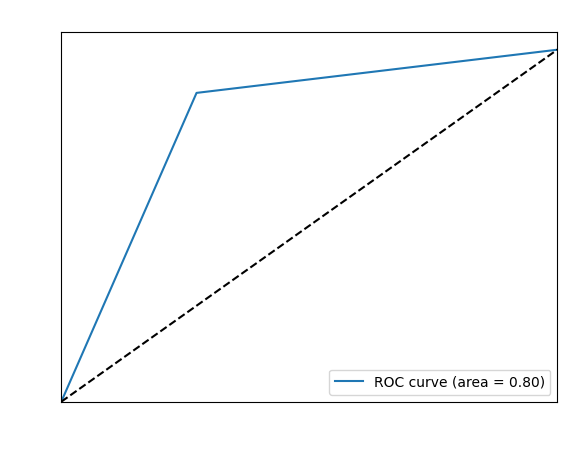

In [ ]:
#getting roc_auc_score and roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_test_pred)
roc_auc1 = roc_auc_score(y1_test, y1_test_pred)
print("ROC AUC Score:", roc_auc1)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.legend(loc="lower right")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

Kheng's Feature Selection

In [ ]:
f2 = [
  'have you had a mental health disorder in the past?',
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 'do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'are you openly identified at work as a person with a mental health issue?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'
]

In [ ]:
X2 = df_label_encoding[f2]
y2 = df_label_encoding["do you currently have a mental health disorder?"]

In [ ]:
#splitting the data into train test and validation
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_validation, X2_test, y2_validation, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=42)

In [ ]:

best_n_estimators2 = find_best_n_estimators(X2_train, y2_train)
print("Best n_estimators:", best_n_estimators2)

#300 took 12mins

Best n_estimators: 159


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
#training model
rf2_classifier = RandomForestClassifier(n_estimators=best_n_estimators2, random_state=42)
rf2_classifier.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=159, random_state=42)

In [ ]:
#making predictions on validation set
y2_validation_pred = rf2_classifier.predict(X2_validation)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#evaluating model score
accuracy_validation2 = accuracy_score(y2_validation, y2_validation_pred)
print("Validation Accuracy:", accuracy_validation2)

Validation Accuracy: 0.8406593406593407


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report2 = classification_report(y2_validation, y2_validation_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        67
           1       0.83      0.95      0.88       115

    accuracy                           0.84       182
   macro avg       0.85      0.80      0.82       182
weighted avg       0.85      0.84      0.83       182



Kheng test results

In [ ]:
# Make predictions on the test set
y2_test_pred = rf2_classifier.predict(X2_test)

# Evaluate the model on the test set
accuracy_test2 = accuracy_score(y2_test, y2_test_pred)
f1_score2 = f1_score(y2_test, y2_test_pred)
precision_score2 = precision_score(y2_test, y2_test_pred)
recall_score2 = recall_score(y2_test, y2_test_pred)
print("Test Accuracy:", accuracy_test2)
print("F1 score:", f1_score2)
print("Precision Score:", precision_score2)
print("Recall Score:", recall_score2)

Test Accuracy: 0.8306010928961749
F1 score: 0.8597285067873303
Precision Score: 0.8260869565217391
Recall Score: 0.8962264150943396


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report2 = classification_report(y2_test, y2_test_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.83      0.90      0.86       106

    accuracy                           0.83       183
   macro avg       0.83      0.82      0.82       183
weighted avg       0.83      0.83      0.83       183



ROC AUC Score: 0.8182430776770401


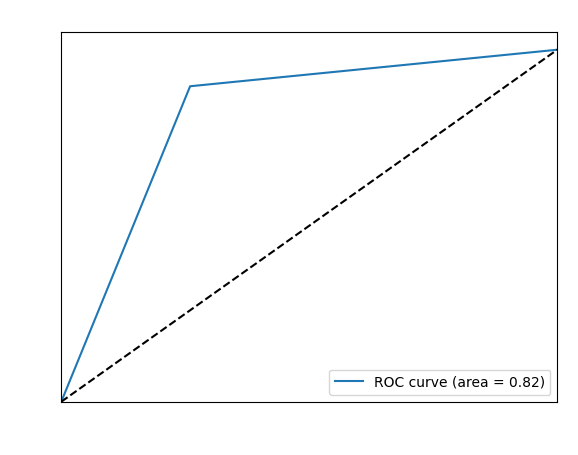

In [ ]:
#getting roc_auc_score and roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_test_pred)
roc_auc2 = roc_auc_score(y2_test, y2_test_pred)
print("ROC AUC Score:", roc_auc2)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.legend(loc="lower right")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

### Mingyao's Feature Selection

In [ ]:
f3 = selected_features

In [ ]:
X3 = df_label_encoding[f3]
y3 = df_label_encoding["do you currently have a mental health disorder?"]

In [ ]:
#splitting the data into train test and validation
X3_train, X3_temp, y3_train, y3_temp = train_test_split(X3, y3, test_size=0.2, random_state=42)
X3_validation, X3_test, y3_validation, y3_test = train_test_split(X3_temp, y3_temp, test_size=0.5, random_state=42)

In [ ]:

best_n_estimators3 = find_best_n_estimators(X3_train, y3_train)
print("Best n_estimators:", best_n_estimators3)

#300 took 12mins

Best n_estimators: 256


In [ ]:
#training model
rf3_classifier = RandomForestClassifier(n_estimators=best_n_estimators3, random_state=42)
rf3_classifier.fit(X3_train, y3_train)

RandomForestClassifier(n_estimators=256, random_state=42)

In [ ]:
#making predictions on validation set
y3_validation_pred = rf3_classifier.predict(X3_validation)

In [ ]:
#evaluating model score
accuracy_validation3 = accuracy_score(y3_validation, y3_validation_pred)
print("Validation Accuracy:", accuracy_validation3)

Validation Accuracy: 0.8296703296703297


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report3 = classification_report(y3_validation, y3_validation_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.88      0.63      0.73        67
           1       0.81      0.95      0.88       115

    accuracy                           0.83       182
   macro avg       0.84      0.79      0.80       182
weighted avg       0.84      0.83      0.82       182



MingYao Test set results

In [ ]:
# Make predictions on the test set
y3_test_pred = rf3_classifier.predict(X3_test)

# Evaluate the model on the test set
accuracy_test3 = accuracy_score(y3_test, y3_test_pred)
print("Test Accuracy:", accuracy_test3)
f1_score3 = f1_score(y3_test, y3_test_pred)
precision_score3 = precision_score(y3_test, y3_test_pred)
recall_score3 = recall_score(y3_test, y3_test_pred)
print("F1 score:", f1_score3)
print("Precision Score:", precision_score3)
print("Recall Score:", recall_score3)

Test Accuracy: 0.819672131147541
F1 score: 0.8546255506607929
Precision Score: 0.8016528925619835
Recall Score: 0.9150943396226415


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report3 = classification_report(y3_test, y3_test_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        77
           1       0.80      0.92      0.85       106

    accuracy                           0.82       183
   macro avg       0.83      0.80      0.81       183
weighted avg       0.82      0.82      0.82       183



ROC AUC Score: 0.8017030139671648


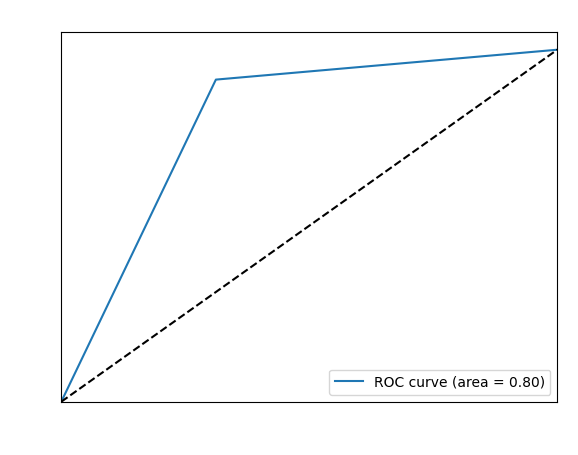

In [ ]:
#getting roc_auc_score and roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr3, tpr3, thresholds3 = roc_curve(y3_test, y3_test_pred)
roc_auc3 = roc_auc_score(y3_test, y3_test_pred)
print("ROC AUC Score:", roc_auc3)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.legend(loc="lower right")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

# Running without obvious columns

In [ ]:
#dropping "obvious columns"
X_wo = X.drop(columns=['have you had a mental health disorder in the past?','are you openly identified at work as a person with a mental health issue?','have you ever sought treatment for a mental health disorder from a mental health professional?'])

y_wo = y

In [ ]:
#doing feature selection using genetic algorithm
X_wo = pd.get_dummies(X_wo)
estimators = DecisionTreeClassifier()
selectors = GeneticSelectionCV(estimators,
    cv=10,
    verbose=4,
    scoring="accuracy",
    max_features=10,
    min_features=10,
    n_population=100,
    crossover_proba=0.7,
    mutation_proba=0.3,
    n_generations=500,
    crossover_independent_proba=0.7,
    mutation_independent_proba=0.07,
    tournament_size=5,
    n_gen_no_change=20,
    caching=True,
    n_jobs=-4)
selectors = selectors.fit(X_wo, y_wo)
print(selectors.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                               	max                               
0  	100   	[  0.603566  10.         0.031296]	[ 0.033433  0.        0.007652]	[  0.524962  10.         0.017485]	[  0.68754   10.         0.055795]
1  	74    	[-5299.697753    10.52      5300.014633]	[ 4991.312846     1.884038  4990.976346]	[-10000.            4.            0.017918]	[     0.68754     17.       10000.     ]
2  	86    	[-6399.763535    10.37      6400.010906]	[ 4800.315286     1.659247  4799.985459]	[-10000.            7.            0.012625]	[     0.696877     15.        10000.      ]
3  	73    	[-5599.706358    10.1       5600.013302]	[ 4964.200732     1.382027  4963.854452]	[-10000.            6.            0.012625]	[     0.696877     14.        10000.      ]
4  	76    	[-5499.697357    10.23      5500.013053]	[ 4975.27177      1.406094  4974.922755]	[-10000.            6.      

In [ ]:
selected_features2 = []
num_selected = 0
for i in range(len(selectors.support_)):
    if selectors.support_[i]:
        print(X.columns[i])
        selected_features2.append(X.columns[i])
        num_selected2 = num_selected+1

selected_features2

do you have a family history of mental illness?
have you had a mental health disorder in the past?
overall, how much importance does your employer place on physical health?
were you aware of the options for mental health care provided by your previous employers?
have your previous employers provided mental health benefits?
have you ever discussed your mental health with your employer?
have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
would you have been willing to discuss your mental health with your coworkers at previous employers?
is your employer primarily a tech company/organization?
was your employer primarily a tech company/organization?


['do you have a family history of mental illness?',
 'have you had a mental health disorder in the past?',
 'overall, how much importance does your employer place on physical health?',
 'were you aware of the options for mental health care provided by your previous employers?',
 'have your previous employers provided mental health benefits?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'would you have been willing to discuss your mental health with your coworkers at previous employers?',
 'is your employer primarily a tech company/organization?',
 'was your employer primarily a tech company/organization?']

Cheryl's feature selection

In [ ]:
f1_wo = [
    "have you ever discussed your mental health with coworkers?",
    "have you ever discussed your mental health with your employer?",
    "have your previous employers provided mental health benefits?",
    "did you ever discuss your mental health with a previous coworker(s)?",
    "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",
    "overall, how much importance did your previous employer place on mental health?",
    "did you ever discuss your mental health with your previous employer?",
    "do you have a family history of mental illness?",
    "were you aware of the options for mental health care provided by your previous employers?",
    "was your employer primarily a tech company/organization?"
]

In [ ]:
X1_wo = X_wo[f1_wo]
y1_wo = y

In [ ]:
#splitting the data into train test and validation
X1_wo_train, X1_wo_temp, y1_wo_train, y1_wo_temp = train_test_split(X1_wo, y1_wo, test_size=0.2, random_state=42)
X1_wo_validation, X1_wo_test, y1_wo_validation, y1_wo_test = train_test_split(X1_wo_temp, y1_wo_temp, test_size=0.5, random_state=42)

In [ ]:

best_n_estimators4 = find_best_n_estimators(X1_wo_train, y1_wo_train)
print("Best n_estimators:", best_n_estimators4)

#300 took 12mins

Best n_estimators: 198


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
#training model
rf1_wo_classifier = RandomForestClassifier(n_estimators=best_n_estimators4, random_state=42)
rf1_wo_classifier.fit(X1_wo_train, y1_wo_train)

RandomForestClassifier(n_estimators=198, random_state=42)

In [ ]:
#making predictions on validation set
y1_wo_validation_pred = rf1_wo_classifier.predict(X1_wo_validation)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#evaluating model score
accuracy_validation1_wo = accuracy_score(y1_wo_validation, y1_wo_validation_pred)
print("Validation Accuracy:", accuracy_validation1_wo)

Validation Accuracy: 0.7362637362637363


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report1_wo = classification_report(y1_wo_validation, y1_wo_validation_pred)
print(report1_wo)

              precision    recall  f1-score   support

           0       0.70      0.49      0.58        67
           1       0.75      0.88      0.81       115

    accuracy                           0.74       182
   macro avg       0.73      0.69      0.69       182
weighted avg       0.73      0.74      0.72       182



Cheryl test result

In [ ]:
# Make predictions on the test set
y1_wo_test_pred = rf1_wo_classifier.predict(X1_wo_test)

# Evaluate the model on the test set
f1_score1_wo = f1_score(y1_wo_test, y1_wo_test_pred)
precision_score1_wo = precision_score(y1_wo_test, y1_wo_test_pred)
recall_score1_wo = recall_score(y1_wo_test, y1_wo_test_pred)
print("Test Accuracy:", accuracy_test1_wo)
print("F1 score:", f1_score1_wo)
print("Precision Score:", precision_score1_wo)
print("Recall Score:", recall_score1_wo)

Test Accuracy: 0.726775956284153
Test Accuracy: 0.726775956284153
F1 score: 0.7727272727272728
Precision Score: 0.7456140350877193
Recall Score: 0.8018867924528302


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report1_wo = classification_report(y1_wo_test, y1_wo_test_pred)
print(report1_wo)

              precision    recall  f1-score   support

           0       0.70      0.62      0.66        77
           1       0.75      0.80      0.77       106

    accuracy                           0.73       183
   macro avg       0.72      0.71      0.72       183
weighted avg       0.72      0.73      0.72       183



ROC AUC Score: 0.8182430776770401


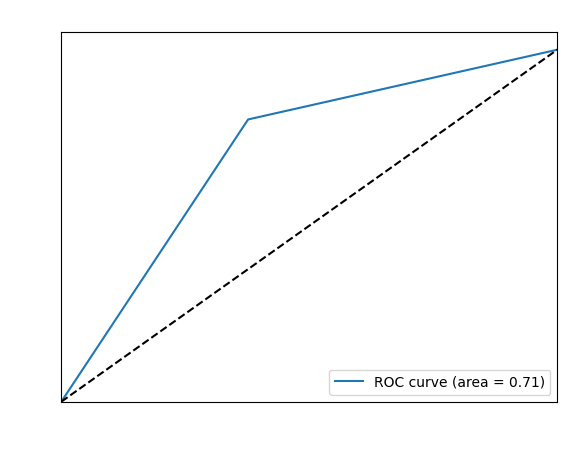

In [ ]:
#getting roc_auc_score and roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr1_wo, tpr1_wo, thresholds1_wo = roc_curve(y1_wo_test, y1_wo_test_pred)
roc_auc1_wo = roc_auc_score(y1_wo_test, y1_wo_test_pred)
print("ROC AUC Score:", roc_auc2)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1_wo, tpr1_wo, label='ROC curve (area = %0.2f)' % roc_auc1_wo)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.legend(loc="lower right")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

Kheng's feature selecton

In [ ]:
f2_wo = ['do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
 'would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
 'overall, how well do you think the tech industry supports employees with mental health issues?',
 'how willing would you be to share with friends and family that you have a mental illness?']

In [ ]:
X2_wo = X_wo[f2_wo]
y2_wo = y

In [ ]:
#splitting the data into train test and validation
X2_wo_train, X2_wo_temp, y2_wo_train, y2_wo_temp = train_test_split(X2_wo, y2_wo, test_size=0.2, random_state=42)
X2_wo_validation, X2_wo_test, y2_wo_validation, y2_wo_test = train_test_split(X2_wo_temp, y2_wo_temp, test_size=0.5, random_state=42)

In [ ]:

best_n_estimators5 = find_best_n_estimators(X2_wo_train, y2_wo_train)
print("Best n_estimators:", best_n_estimators5)

#300 took 12mins

Best n_estimators: 259


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
#training model
rf2_wo_classifier = RandomForestClassifier(n_estimators=best_n_estimators5, random_state=42)
rf2_wo_classifier.fit(X2_wo_train, y2_wo_train)

RandomForestClassifier(n_estimators=259, random_state=42)

In [ ]:
#making predictions on validation set
y2_wo_validation_pred = rf2_wo_classifier.predict(X2_wo_validation)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#evaluating model score
accuracy_validation2_wo = accuracy_score(y2_wo_validation, y2_wo_validation_pred)
print("Validation Accuracy:", accuracy_validation2_wo)

Validation Accuracy: 0.7472527472527473


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report2_wo = classification_report(y2_wo_validation, y2_wo_validation_pred)
print(report2_wo)

              precision    recall  f1-score   support

           0       0.72      0.51      0.60        67
           1       0.76      0.89      0.82       115

    accuracy                           0.75       182
   macro avg       0.74      0.70      0.71       182
weighted avg       0.74      0.75      0.74       182



Kheng test result

In [ ]:
# Make predictions on the test set
y2_wo_test_pred = rf2_wo_classifier.predict(X2_wo_test)

# Evaluate the model on the test set
accuracy_test2_wo = accuracy_score(y2_wo_test, y2_wo_test_pred)
print("Test Accuracy:", accuracy_test2_wo)
f1_score2_wo = f1_score(y2_wo_test, y2_wo_test_pred)
precision_score2_wo = precision_score(y2_wo_test, y2_wo_test_pred)
recall_score2_wo = recall_score(y2_wo_test, y2_wo_test_pred)
print("F1 score:", f1_score2_wo)
print("Precision Score:", precision_score2_wo)
print("Recall Score:", recall_score2_wo)

Test Accuracy: 0.7213114754098361
F1 score: 0.775330396475771
Precision Score: 0.7272727272727273
Recall Score: 0.8301886792452831


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report2_wo = classification_report(y2_wo_test, y2_wo_test_pred)
print(report2_wo)

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        77
           1       0.73      0.83      0.78       106

    accuracy                           0.72       183
   macro avg       0.72      0.70      0.70       183
weighted avg       0.72      0.72      0.72       183



ROC AUC Score: 0.8182430776770401


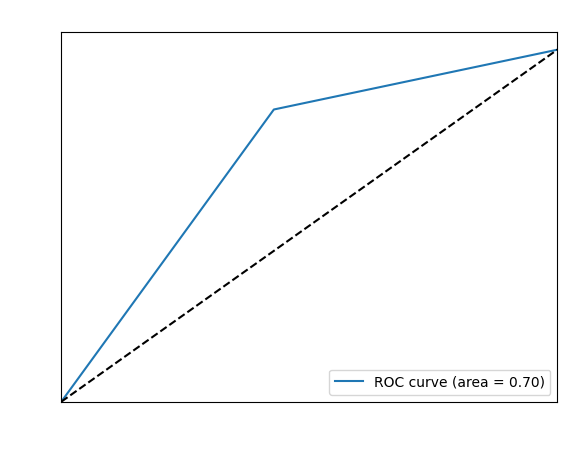

In [ ]:
#getting roc_auc_score and roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr2_wo, tpr2_wo, thresholds2_wo = roc_curve(y2_wo_test, y2_wo_test_pred)
roc_auc2_wo = roc_auc_score(y2_wo_test, y2_wo_test_pred)
print("ROC AUC Score:", roc_auc2)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr2_wo, tpr2_wo, label='ROC curve (area = %0.2f)' % roc_auc2_wo)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.legend(loc="lower right")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

### MingYao's Feature Selection

In [ ]:
f3 = ['do you have a family history of mental illness?',
 'would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'overall, how much importance does your employer place on physical health?',
 'how willing would you be to share with friends and family that you have a mental illness?',
 'have your previous employers provided mental health benefits?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'overall, how much importance did your previous employer place on physical health?',
 'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'is your employer primarily a tech company/organization?']


In [ ]:
f3_wo = f3

In [ ]:
#selecting the features seleted by Genetic Algo
X3_wo = X_wo[f3_wo]
y3_wo = y

In [ ]:
#splitting the data into train test and validation
X3_wo_train, X3_wo_temp, y3_wo_train, y3_wo_temp = train_test_split(X3_wo, y3_wo, test_size=0.2, random_state=42)
X3_wo_validation, X3_wo_test, y3_wo_validation, y3_wo_test = train_test_split(X3_wo_temp, y3_wo_temp, test_size=0.5, random_state=42)

In [ ]:

best_n_estimators6 = find_best_n_estimators(X1_wo_train, y1_wo_train)
print("Best n_estimators:", best_n_estimators6)

#300 took 12mins

Best n_estimators: 198


In [ ]:
#training model
rf3_wo_classifier = RandomForestClassifier(n_estimators=best_n_estimators6, random_state=42)
rf3_wo_classifier.fit(X3_wo_train, y3_wo_train)

RandomForestClassifier(n_estimators=198, random_state=42)

In [ ]:
#making predictions on validation set
y3_wo_validation_pred = rf3_wo_classifier.predict(X3_wo_validation)

In [ ]:
#evaluating model score
accuracy_validation3_wo = accuracy_score(y3_wo_validation, y3_wo_validation_pred)
print("Validation Accuracy:", accuracy_validation3_wo)

Validation Accuracy: 0.7252747252747253


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report3_wo = classification_report(y3_wo_validation, y3_wo_validation_pred)
print(report3_wo)

              precision    recall  f1-score   support

           0       0.72      0.42      0.53        67
           1       0.73      0.90      0.81       115

    accuracy                           0.73       182
   macro avg       0.72      0.66      0.67       182
weighted avg       0.72      0.73      0.70       182



### MingYao Test Results

In [ ]:
# Make predictions on the test set
y3_wo_test_pred = rf3_wo_classifier.predict(X3_wo_test)

# Evaluate the model on the test set
accuracy_test3_wo = accuracy_score(y3_wo_test, y3_wo_test_pred)
print("Test Accuracy:", accuracy_test3_wo)
f1_score3_wo = f1_score(y3_wo_test, y3_wo_test_pred)
precision_score3_wo = precision_score(y3_wo_test, y3_wo_test_pred)
recall_score3_wo = recall_score(y3_wo_test, y3_wo_test_pred)
print("F1 score:", f1_score3_wo)
print("Precision Score:", precision_score3_wo)
print("Recall Score:", recall_score3_wo)

Test Accuracy: 0.6994535519125683
F1 score: 0.7639484978540773
Precision Score: 0.7007874015748031
Recall Score: 0.839622641509434


In [ ]:
#getting precison, recall, f1-score, support
from sklearn.metrics import classification_report

report3_wo = classification_report(y3_wo_test, y3_wo_test_pred)
print(report3_wo)

              precision    recall  f1-score   support

           0       0.70      0.51      0.59        77
           1       0.70      0.84      0.76       106

    accuracy                           0.70       183
   macro avg       0.70      0.67      0.68       183
weighted avg       0.70      0.70      0.69       183



ROC AUC Score: 0.8017030139671648


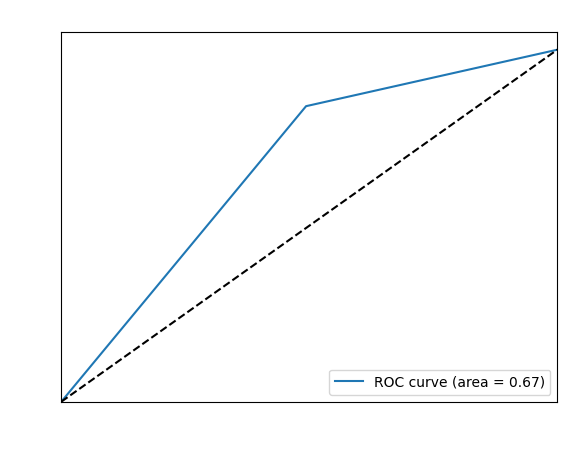

In [ ]:
#getting roc_auc_score and roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr3_wo, tpr3_wo, thresholds3_wo = roc_curve(y3_wo_test, y3_wo_test_pred)
roc_auc3_wo = roc_auc_score(y3_wo_test, y3_wo_test_pred)
print("ROC AUC Score:", roc_auc3)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr3_wo, tpr3_wo, label='ROC curve (area = %0.2f)' % roc_auc3_wo)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.legend(loc="lower right")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()